# Data Analysis
# Linear Regression 1

In this lecture, we'll discuss:
1. Simple linear regression (SLR)
2. Multiple linear regression 
3. Transformations <br>
-- Categorical variables <br>
--Nonlinear relationships 

Recommended reading:
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 3 [digital version available here](https://www.statlearning.com/)


# 1. Simple linear regression with python

### Python packages for regression
There are several different python packages that do regression:
1. [statsmodels](http://statsmodels.sourceforge.net/)
+ [scikit-learn](http://scikit-learn.org/)
+ [SciPy](http://www.scipy.org/)
+ ... 


Today, we'll look at both `statsmodels` and `scikit-learn`. One can also use SciPy for linear regression, but its built-in functionality is comparatively limited. 


### Example dataset
To illustrate linear regression, we'll use the 'Advertising' dataset from
[ISLR book website](https://www.statlearning.com/)


For 200 different 'markets' (think different cities), this dataset consists of the number of sales of a particular product as well as the advertising budget for different media: TV, radio, and newspaper. 

We’ll use linear regression to study the effect of advertising on sales. 
Here, sales is the dependent variable and the budgets are the independent variables. This might help inform or evaluate an advertising strategy for this product.  

In [3]:
# imports and setup

import scipy as sc
import numpy as np
from scipy.stats import norm
import seaborn as sns

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [4]:
advert = pd.read_csv('Advertising.csv',index_col=0) #load data
advert

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## 1.1 Plotting the data and doing the regression with statsmodels

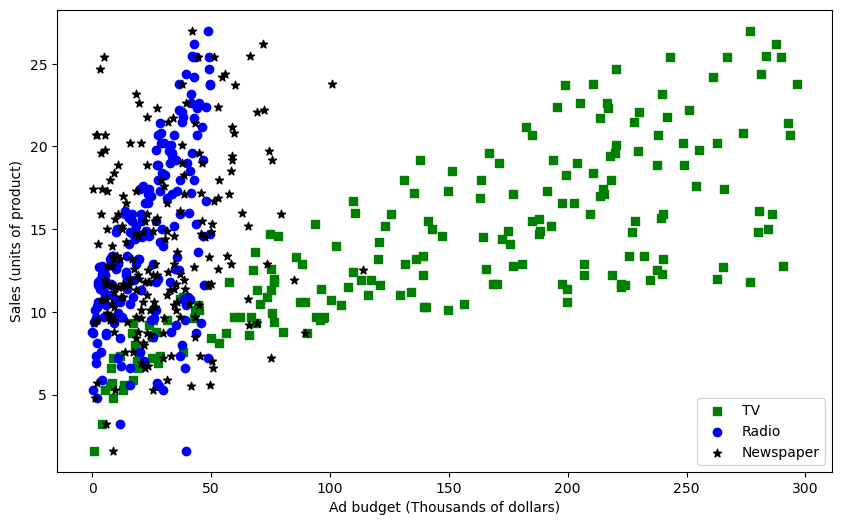

In [5]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='g',marker='s',label='TV')
plt.scatter(x=advert['Radio'],y=advert['Sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['Newspaper'],y=advert['Sales'],c='k',marker='*',label='Newspaper')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()

In [4]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Observations

1. From the plot, it is clear that there is a relationship between the advertising budgets and sales. Basically, the more money spent, the larger the number of sales. 
+  The most money was spent on TV advertising. The amount for Radio and Newspaper is not that different among different markets, whereas the standard deviation for TV advertising is larger. 
+  Other things you notice?

### Questions we might be interested in
1. How can we quantify the relationship between advertising and sales? Can we predict the effect of each ad media on sales? Is the relationship linear? 
+  Which of the different ad media (TV, Radio, Newspaper) are the most effective at generating sales? 
+  Are there interactions between the different ad media?

First, let's just look at the **effect of TV advertising on sales**. We use the linear regression model
$$
Sales = \beta_0 + \beta_1 \times TV.
$$

In [6]:
ad_TV_ols = sm.ols(formula="Sales ~ TV", data=advert).fit()
ad_TV_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           1.47e-42
Time:                        20:03:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

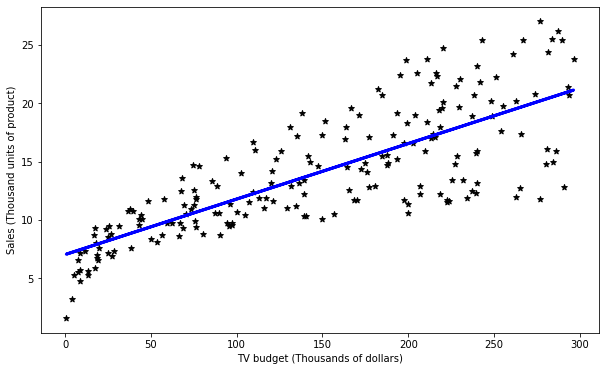

In [6]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='k',marker='*',label='TV')
plt.plot(advert['TV'],ad_TV_ols.predict(),c='blue',linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

### Interpretation and discussion

The intercept of the line is $\hat{\beta}_0 = 7.032$. This means that without any TV advertising, the model predicts that 7,032 units of product will be sold. 

The slope of the line is $\hat{\beta}_1 = 0.0475$. This means that the model predicts that for every additional $1k spent on TV advertising, an additional 47.5 units of product are sold. 

**So how good is this fit?** 

One way to measure the quality of the fit is to look at the sum of the squared residuals (or errors),
$$
SSR = \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2. 
$$
Remember that SSR is the quantity that we minimized to find $\hat{\beta}_0$ and $\hat{\beta}_1$ in the first place (We called it $L(\beta_0,\beta_1)$.) If this number is very small, then the model fits the data very well. 


In [8]:
ad_TV_ols.ssr

2102.5305831313512

But how small is small?...good question. This number, SSR, is difficult to interpret by itself. A more easily interpretable number is the **$R^2$ value**. 

The $R^2$ value is an alternative way to measure how good of a fit the model is to the data. The benefit of the $R^2$ value over the SSR is that it is a proportion (takes values between 0 and 1) so it is easier to interpret what a *good* value is. We first define the residual sum of squares (SSR) and total sum of squares (TSS) by
$$
SSR = \sum_{i=1}^n (y_i - \hat\beta_0 - \hat\beta_1 x_i)^2
\qquad \text{and} \qquad 
TSS = \sum_{i=1}^n (y_i - \bar y)^2. 
$$
SSR measures the amount of variability left unexplained after the linear regression. TSS measures the total variance in the data. We compute the $R^2$ value as
$$
R^2 = 1 - \frac{SSR}{TSS}.
$$
This is the proportion of the variance explained by the model. A model is good if the $R^2$ value is nearly one (the model explains all of the variance in the data). 

In our model, the value is $R^2 = 0.612$, which isn't bad. The model explains $61\%$ of the variability in sales. 

*Note*: for linear regression, the $R^2$ value is the same as correlation (squared), but the $R^2$ value more easily generalizes to more complicated regression models than correlation, so the $R^2$ value is typically considered instead of correlation.

![image](http://imgs.xkcd.com/comics/linear_regression.png)



## 1.2 Repeating the simple linear regression with scikit-learn

[7.03259355] [[0.04753664]]
0.611875050850071


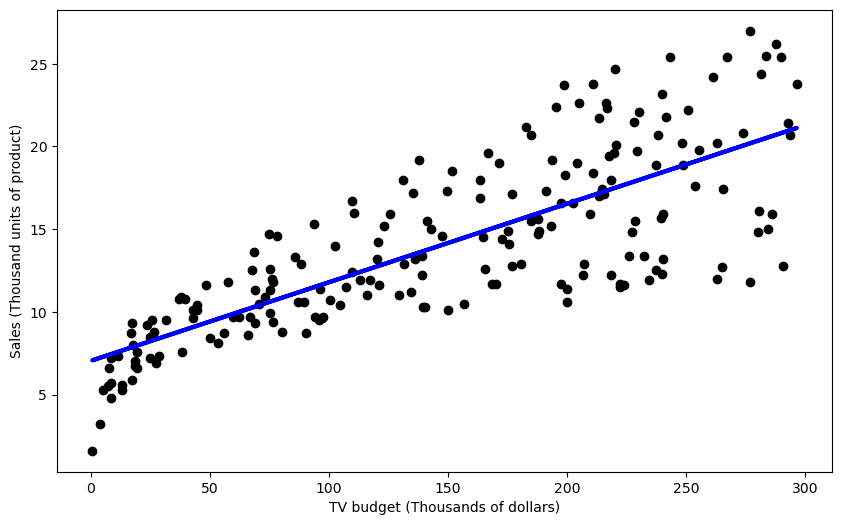

In [9]:
lr = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = advert['TV'].values.reshape(advert['TV'].shape[0],1)
y = advert['Sales'].values.reshape(advert['Sales'].shape[0],1)
#we extract the values, and then the reshape is going to convert those to a numpy array dimension [200x1]

lr.fit(X=x, y=y)

#another difference with statsmodels is that we don't get a nice summary
print(lr.intercept_, lr.coef_) #parameters 
print(lr.score(x, y)) #R^2

plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## 1.3 Hypothesis testing in linear regression

In the previous lecture/notebook, we introduced a distinction between descriptive statistics and statistical inference. 

The statistical inference way of looking at this problem would be to suppose that there exists a ground truth population with $x$ and $y$ related by 
$$
y = \beta_0 + \beta_1 x 
$$
for some unknown values of $\beta_0$ and $\beta_1$. 
Our sampled data consists of points $(x_i, y_i)$ of the form 
$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i. 
$$
Here $\varepsilon_i$ are random variables (say normally distributed) that we think of as "error" being introduced into the samples. The job of the statistician is to *infer* the values of $\beta_0$ and $\beta_1$ from the erroneous data.  

This is precisely the setting we were in when determining whether a coin was fair. There, we had a sample proportion of heads (analogous to the samples $(x_i,y_i)$ here.)

In simple linear regression, we will take the null hypothesis to be
$$
H_0: \text{There is no relationship between $x$ and $y$} \iff \beta_1 = 0 
$$
with alternative
$$
H_a: \text{There is a relationship between $x$ and $y$}  \iff \beta_1 \neq 0 
$$
We assume that $\varepsilon$ is a **normal random** variable with zero mean and variance $\sigma^2$. Using similar ideas as in hypothesis testing, the standard error for $\hat \beta_0$ and $\hat \beta_1$ (estimates of true parameters in this model) are computed to be (for more info on the exact derivation, check the [video](https://www.youtube.com/watch?v=rODUBTRUV0U)).

$$
\qquad
\hat{\beta}_0 = \overline{y} -  \hat{\beta}_1 \overline{x} \quad
\textrm{and} \quad
 \hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) }{\sum_{i=1}^n (x_i - \overline{x})^2}
\qquad  
$$

$$
SE(\hat \beta_0)^2 = \sigma^2 \left( \frac{1}{n} + \frac{\bar x^2}{\sum_{i=1}^n (x_i - \bar x)^2} \right) 
\quad \text{and} \quad
SE(\hat \beta_1)^2 =  \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar x)^2}
$$


For this hypothesis test, the test statistic is 
$$
t = \frac{ \hat \beta_1 - 0}{SE(\hat \beta_1)},
$$
which under the assumptions of the null hypothesis, is distributed according to the $t$ distribution with $n-2$ degrees of freedom. The $p$-value is computed as the probability of observing a value as extreme as $|t|$. A small $p$-value is interpreted to mean that there is an association between the independent and dependent variables. 

Now, let's return to the linear regression model of sales on TV advertising, 
$$
Sales = \beta_0 + \beta_1 \times TV.
$$
Looking at the `statsmodels` output, we see that the $p$-values for both the intercept and the slope are very small. The probability of seeing (or obtaining) these values is nearly zero, assuming $H_0$ is true. So, we reject the null hypothesis and say there is an association between TV advertising (independent variable) and sales (dependent variable). 

Moreover, we say that there is approx. 95% chance that the interval $[\hat \beta_1-2 SE(\hat \beta_1),\hat \beta_1+2 SE(\hat \beta_1)]$ will contain the true value of $\beta_1$ (under a scenario where we got repeated samples like the present sample). That is also given by `statsmodels`!


## Question (poll):

$$
SE(\hat \beta_0)^2 = \sigma^2 \left( \frac{1}{n} + \frac{\bar x^2}{\sum_{i=1}^n (x_i - \bar x)^2} \right) 
\quad \text{and} \quad
SE(\hat \beta_1)^2 =  \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar x)^2}
$$

Proposition 1: "The bigger the noise, the bigger the SE" True or False?

Proposition 2: "As x points are more spread, the bigger the SE" True or False?

## 1.4 Checks for a good linear model

**The obvious ones**. $SSR$ (or $SSE$ or $MSE$) and $R^2$ are good starting points.

**Linearity**. The dependent variable $Y$ is assumed to have a linear relationship with the independent variable $X$. Easy to check with 1 variable, more complex with more variables.

**Checking the residuals**. The residual errors are assumed to be normally distributed, to be independent and to have constant variance (homoscedasticity). We will see on the next slide how to check for these.

**Beware of outliers and/or high leverage points**. You can have weird values either on the $y$ or $x$ variables. You can exclude them from the model but be honest.

### Residual analysis

When we estimate the variance of ε, we assume that the residuals ($e_i = y_i-\hat{y}_i$) are uncorrelated and normally distributed with mean 0 and fixed variance. These assumptions need to be verified using the data.

In residual analysis, we typically create two types of plots:
* a plot of $e_i$ with respect to $x_i$. This allows us to  compare the distribution of the noise at different  values of $x_i$.

* a histogram of $e_i$. This allows us to explore the  distribution of the noise independent of $x_i$, or a plot of $e_i$ with respect to fitted values ($y_i$)

In [10]:
#we do it for the scikit learn model
lr = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = advert['TV'].values.reshape(advert['TV'].shape[0],1)
y = advert['Sales'].values.reshape(advert['Sales'].shape[0],1)
lr.fit(X=x, y=y)

preds= lr.predict(x)
resid= y - preds

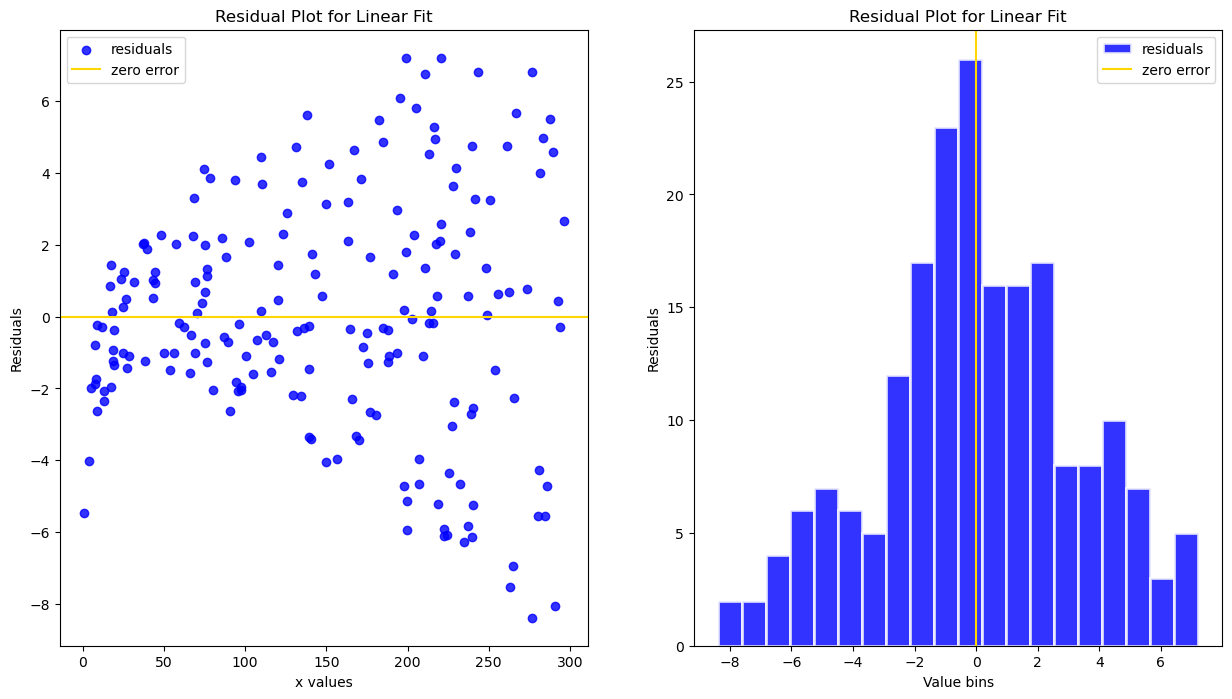

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].scatter(x=x, y=resid, color='blue', alpha=0.8, label='residuals')
ax[0].axhline(y=0, color='gold', label='zero error')

ax[0].set_xlabel('x values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residual Plot for Linear Fit')
ax[0].legend(loc='best')

ax[1].hist(resid, color='blue', alpha=0.8, label='residuals', bins=20, edgecolor='white', linewidth=2)
ax[1].axvline(x=0, color='gold', label='zero error')


ax[1].set_xlabel('Value bins')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residual Plot for Linear Fit')
ax[1].legend(loc='best')

## Question (poll)

Which one is a better fit? Note that these are plotting residuals vs. fitted values.

![residplots.png](residplots.png)

A. Left <br> 
B. Right <br> 
C. Equally good fits <br>
D. Equally bad fits  <br> 
E. Unicorns are pink  <br> 

<center>
<div>
<img src="FPPzKAgXwB8JlpK.jpeg" width="250"/>
</div>
</center>

### Other advertisement methods?  
Recall that we not only know the ad budget for TV, but also Radio and Newspaper. 

Now we are going to repeat the linear regression analysis for the other types of advertisements using `statsmodels`. 

In [11]:
ad_Radio_ols = sm.ols(formula="Sales ~ Radio", data=advert).fit()
ad_Radio_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           4.35e-19
Time:                        09:47:53   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
ad_Newspaper_ols = sm.ols(formula="Sales ~ Newspaper", data=advert).fit()
ad_Newspaper_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 23 Feb 2024   Prob (F-statistic):            0.00115
Time:                        09:47:53   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

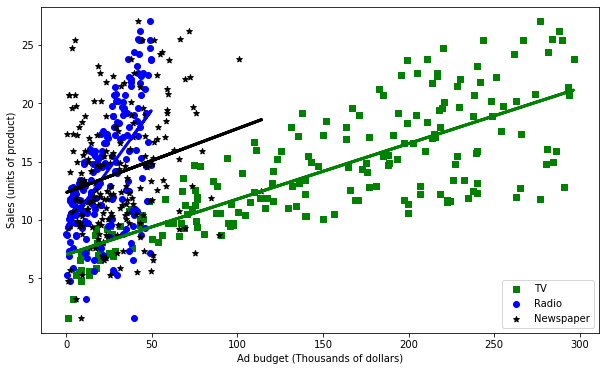

In [13]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='g',marker='s',label='TV')
plt.scatter(x=advert['Radio'],y=advert['Sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['Newspaper'],y=advert['Sales'],c='k',marker='*',label='Newspaper')
plt.legend(numpoints=1,loc=4)

plt.plot(advert['TV'],ad_TV_ols.predict(),c='g',linewidth=3)
plt.plot(advert['Radio'],ad_Radio_ols.predict(),c='b',linewidth=3)
plt.plot(advert['Newspaper'],ad_Newspaper_ols.predict(),c='k',linewidth=3)

plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()


### Interpretation

*So what is the most effective advertising media?*

The slope for radio is largest, so you might argue that this is the most effective advertising media. For every additional \$1k spent on Radio advertising, an additional 202 units of product are sold. (Compare to 54.7 for newspaper and 47.5 for TV.)

On the other hand, the $R^2$ value for radio is just $33\%$. So the model isn't explaining as much of the data as the model for TV advertising ($R^2 = 61\%$), but is explaining more than the model for newspaper advertising ($R^2 = 5\%$). 

The main problem with the approach here is that for each advertising media we look at, we're ignoring the ads in the other media. For example, in the model for TV advertising, 
$$
Sales = \beta_0 + \beta_1 \times TV,
$$
we're ignoring both Radio and Newspaper advertising. 

We need to take all three into account at once. Maybe we can construct a model that looks like 
$$
Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper. 
$$
This is the idea behind Multiple Linear Regression. 

# 2. Multiple Linear Regression

**Model:**
$$
Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper. 
$$

In [14]:
ad_all_ols = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=advert).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        09:47:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Spending an additional \$1,000  on radio advertising results in an increase in sales by 189 units **iff all other spending remains the same (i.e. TV and newspapers)**. Radio is the most effective at method of advertising. 

In multilinear regression, the F-test is a way to test the null hypothesis,
$$
H_0 = \textrm{all coefficients are zero.}
$$
In this case, we see that the $p$-value for the $F$-statistic is vanishingly small - indicating that our model is significant. 

Now let's consider the individual coefficients in the model and their $p$-values. Note that the coefficients for TV and Radio are approximately the same as for simple linear regression. The coefficient for Newspaper changed significantly. Furthermore, note that the $p$-value is now very large $p=0.86$. There is not sufficient evidence to reject the null hypothesis that the Newspaper and Sales variables have no relationship. 

So then why did the simple linear regression give that there is a relationship between Newspaper and Sales Variables? 
*Newspaper is actually a confounder!* (Think about spurious correlations here). Let's look at the correlations between the four variables. Recall that correlation between two variables is given by 
$$
r_{x,y} = \frac{ \frac{1}{n}\sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{s_x s_y}.
$$

Plotted below is also a scatter plot matrix, which is a good way of visualizing the correlations. 

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


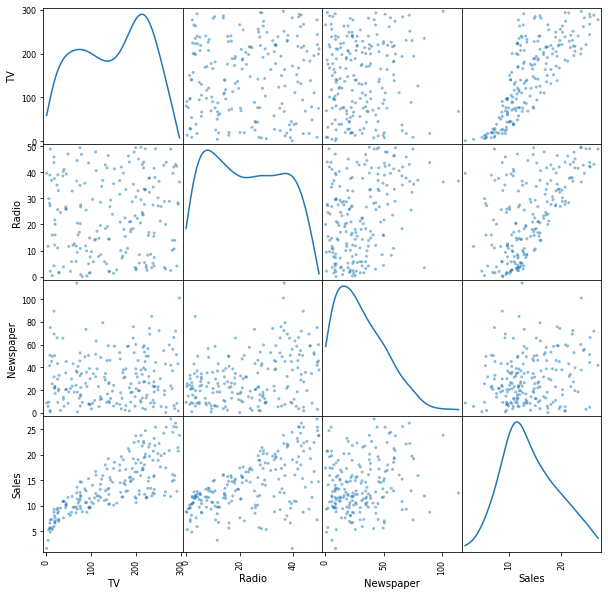

In [15]:
print(advert.corr())
pd.plotting.scatter_matrix(advert, figsize=(10, 10), diagonal='kde')
plt.show()

The correlation between Newspaper and Radio is 0.35, which implies that in markets where the company advertised using Radio, they also advertised using newspaper. Thus, the influence of Radio on Sales can be incorrectly attributed to Newspaper advertisements! 

This leads us to the following linear regression model, where we forget about Newspaper advertisements:
$$
\text{Sales} = \beta\_0 + \beta\_1 \times \text{TV\_budget} + \beta\_2 \times \text{Radio\_budget} 
$$


In [12]:
ad_TR_ols = sm.ols(formula="Sales ~ TV + Radio", data=advert).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           4.83e-98
Time:                        20:58:39   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model performs pretty well. It accounts for (almost) $R^2 = 90\%$ of the variance in the data. 

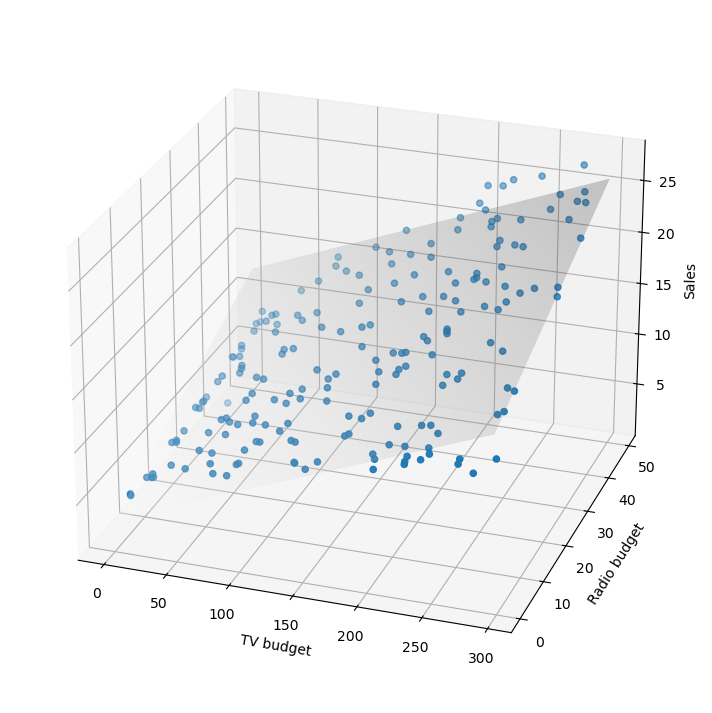

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales'])

x = np.linspace(advert['TV'].min(), advert['TV'].max(), 100)
y = np.linspace(advert['Radio'].min(), advert['Radio'].max(), 100)
X,Y = np.meshgrid(x,y)
par = dict(ad_TR_ols.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y 
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()

One way to correct for adding extra predictors in the model, is to take into account the number of predictors you introduce. That is done with *adjusted* $R^2$. The intuition is that as you add more and more predictors to your model, adjusted $R^2$ might decrease if there is no significant gain in the performance.

$$
\text{adj.}R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}
$$
where $n$ is the number of samples and $p$ is the number of predictors in the model.

This is also provided by `statsmodels`.


# 3. Feature Engineering

## 3.1 One-hot econding

In the following dataset, we have four categorical variables (Gender, Student, Married, Ethnicity). How can we include them in a regression model? 

In [14]:
# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [15]:
# Summarize and describe data

print(credit.dtypes, '\n') 
print(credit['Gender'].value_counts(), '\n')
print(credit['Student'].value_counts(), '\n')
print(credit['Married'].value_counts(), '\n')
print(credit['Ethnicity'].value_counts())
credit.describe()

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object 

Gender
Female    207
 Male     193
Name: count, dtype: int64 

Student
No     360
Yes     40
Name: count, dtype: int64 

Married
Yes    245
No     155
Name: count, dtype: int64 

Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Let's start with a categorical variable with only 2 categories: Gender (Male, Female).

**Idea**: Create a "dummy variable" that turns Gender into a real value: 
$$
\text{Gender\_num}\_i = \begin{cases} 
1 & \text{if $i$-th person is female} \\
0 & \text{if $i$-th person is male}
\end{cases}. 
$$
Then we could try to fit a model of the form
$$
\text{Income} = \beta\_0 + \beta\_1 \times \text{Gender\_num}. 
$$

In [16]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

credit_model = sm.ols(formula="Income ~ Gender_num", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04589
Date:                Thu, 29 Feb 2024   Prob (F-statistic):              0.830
Time:                        21:22:27   Log-Likelihood:                -1992.0
No. Observations:                 400   AIC:                             3988.
Df Residuals:                     398   BIC:                             3996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6103      2.540     17.957      0.000      40.617      50.604
Gender_num    -0.7564      3.531     -0.214      0.830      -7.698       6.185
==============================================================================
Omnibus:                      137.942   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.093
Skew:                           1.735   Prob(JB):                     8.56e-75
Kurtosis:                       5.902   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

The model can be further simplified as follows:

$$
\text{Income} = \begin{cases} 
\beta_0 + \beta_1 & \text{if person is female} \\
\beta_0 & \text{if person is male}
\end{cases}.
$$

So, $\beta_1$ is the effect of being female, versus the baseline model which is being male.

In this specific case, since the $p$-value for the $Gender\_{num}$ coefficient is very large, there is no support for the conclusion that there is a difference in credit card balance between genders.

## What about a categorical variable with 3 categories? 

The Ethnicity variable takes three values: Caucasian, Asian, and African American. 

POLL: Is it correct to do the following coding?

$$
\text{Ethnicity\_num}_i = \begin{cases} 
0 & \text{if $i$-th person is Caucasian} \\
1 & \text{if $i$-th person is Asian} \\ 
2 & \text{if $i$-th person is African American}
\end{cases}. 
$$

We'll need more than one dummy variable:  
$$
\text{Asian}_i = \begin{cases} 
1 & \text{if $i$-th person is Asian} \\
0 & \text{otherwise}
\end{cases}. 
$$
$$
\text{Caucasian}_i = \begin{cases} 
1 & \text{if $i$-th person is Caucasian} \\
0 & \text{otherwise}
\end{cases}. 
$$
The value with no dummy variable--African American--is called the *baseline*.

We can use the `get_dummies` function to automatically get these values

In [20]:
dummy = pd.get_dummies(credit['Ethnicity'])
credit = pd.concat([credit,dummy],axis=1)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,...,Married_num,African American,Asian,Caucasian,African American,Asian,Caucasian,African American,Asian,Caucasian
1,14.891,3606.0,283.0,2.0,34.0,11.0,Male,No,Yes,Caucasian,...,1.0,False,False,True,False,False,True,False,False,True
2,106.025,6645.0,483.0,3.0,82.0,15.0,Female,Yes,Yes,Asian,...,1.0,False,True,False,False,True,False,False,True,False
3,104.593,7075.0,514.0,4.0,71.0,11.0,Male,No,No,Asian,...,0.0,False,True,False,False,True,False,False,True,False
4,148.924,9504.0,681.0,3.0,36.0,11.0,Female,No,No,Asian,...,0.0,False,True,False,False,True,False,False,True,False
5,55.882,4897.0,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian,...,1.0,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,True,False,False,False,False,False,False
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,False,False,False,False,False,False,False,False
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,True,False,False,False,False,False,False
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,True,False,False,False,False,False,False


OLS can also handle the categorical variables for us (we just need to be careful in the interpretation). In `sklearn` you need to create them yourselves (as we saw with the `get_dummies`).

In [21]:
est = sm.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [22]:
est = sm.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


Let's create a dummy variable for whether somebody is a student or not.

In [23]:
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})

In [24]:
est1 = sm.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = sm.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


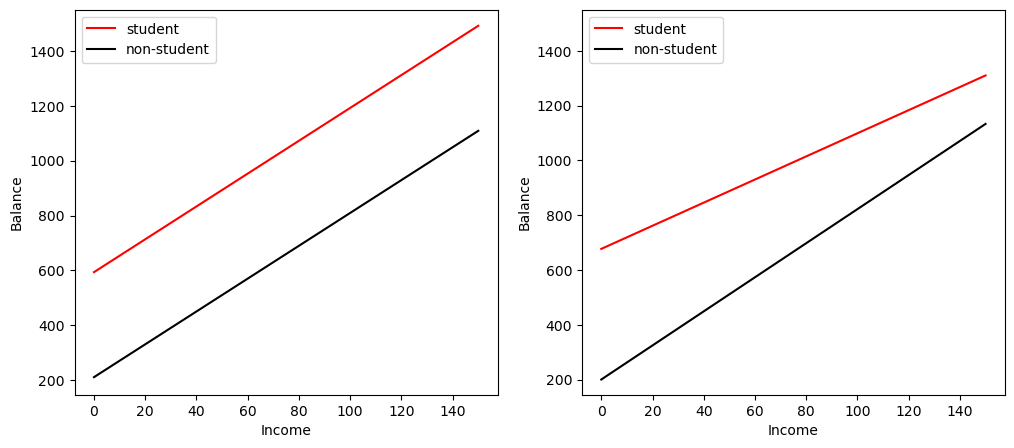

In [25]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(top=1550)

### Interpretation

These plots demonstrate graphically what is the role of the coefficients.

The model on the left is:

$$
\text{balance} = \beta_0 + \beta_1 \times \text{income} + \begin{cases} 
 \beta_2 & \text{if person is student} \\
0 & \text{if person is not a student}
\end{cases}
$$

Which means that the coefficient for $student$ (i.e. $\beta_2$) changes the intercept.

The model on the right is:

$$
\text{balance} = \beta_0 + \beta_1 \times \text{income} + \begin{cases} 
\beta_2 + \beta_3 \times \text{income} & \text{if a student} \\
0 & \text{if not a student}
\end{cases}
$$
or more simply

$$
= \begin{cases} (\beta_0+\beta_2)+(\beta_1+\beta_3)\times \text{income} & \text{if a student} \\
\beta_0 + \beta_1 \times \text{income} & \text{if not a student}
\end{cases}
$$

On the right plot (model with interactions), if you are a student there is a change in the intercept and additionally a change in the slope.

## 3.2 Introducing non-linearity

The truth is never linear.

In [28]:
auto = pd.read_csv('Auto.csv') #load data

# one of the horsepowers is '?', so we just remove it and then map the remaining strings to integers
auto = auto[auto.horsepower != '?']
auto['horsepower'] = auto['horsepower'].map(int)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
print(auto.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [30]:
print(auto.corr(numeric_only=True))

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

Let's consider the relationship between mpg and horsepower.

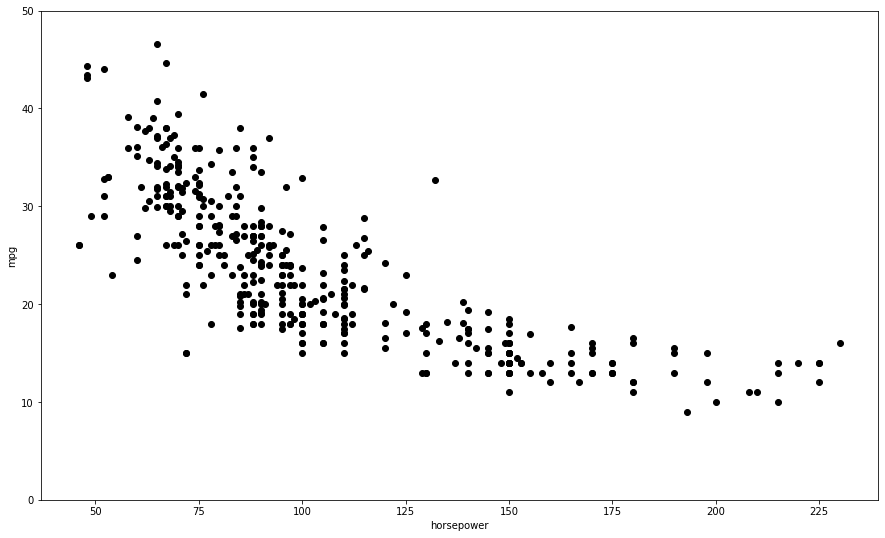

In [30]:
plt.scatter(auto['horsepower'],auto['mpg'],color='black',linewidth=1)
plt.xlabel('horsepower'); plt.ylabel('mpg')
plt.ylim((0,50))
plt.show()

<center>
<div>
<img src="FPP0cIIXwAsXurb.jpeg" width="500"/>
</div>
</center>

We consider the linear model
$$
\text{mpg} = \beta_0 + \beta_1 \times \text{horsepower} + \beta_2 \times \text{horsepower}^2 + \cdots + \beta_m \times \text{horsepower}^d
$$
It might seem that choosing $d$ to be large would be a good thing. After all, a high degree polynomial is more flexible than a small degree polynomial. 

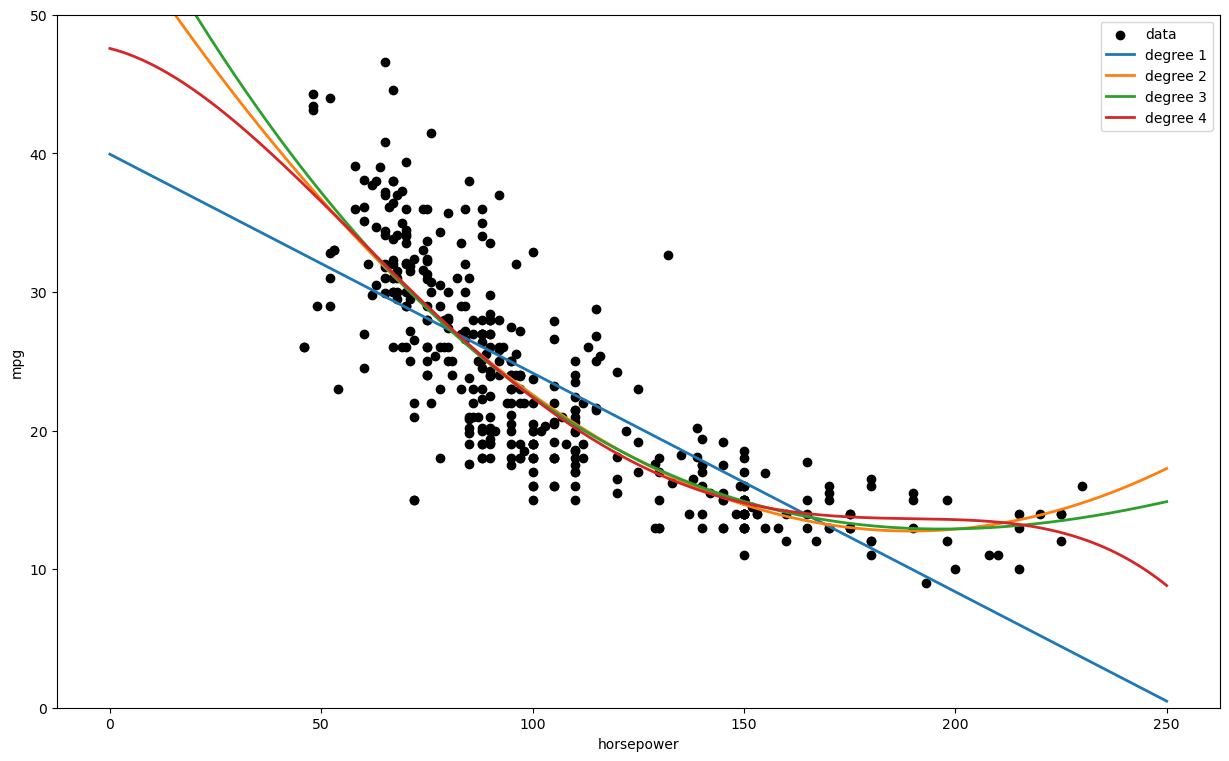

In [31]:
# fit polynomial models
mr1 = sm.ols(formula="mpg ~ horsepower", data=auto).fit()
par1 = dict(mr1.params)
mr2 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0)", data=auto).fit()
par2 = dict(mr2.params)
mr3 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0) + I(horsepower ** 3.0)", data=auto).fit()
par3 = dict(mr3.params)
mr4 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0) + I(horsepower ** 3.0) + I(horsepower ** 4.0)", data=auto).fit()
par4 = dict(mr4.params)

plt.scatter(auto['horsepower'],auto['mpg'],color='black',label="data")

x = np.linspace(0,250,1000)
y1 = par1["Intercept"] + par1['horsepower']*x
y2 = par2["Intercept"] + par2['horsepower']*x + par2['I(horsepower ** 2.0)']*x**2
y3 = par3["Intercept"] + par3['horsepower']*x + par3['I(horsepower ** 2.0)']*x**2 + par3['I(horsepower ** 3.0)']*x**3
y4 = par4["Intercept"] + par4['horsepower']*x + par4['I(horsepower ** 2.0)']*x**2 + par4['I(horsepower ** 3.0)']*x**3 + par4['I(horsepower ** 4.0)']*x**4

plt.plot(x,y1,label="degree 1",linewidth=2)
plt.plot(x,y2,label="degree 2",linewidth=2)
plt.plot(x,y3,label="degree 3",linewidth=2)
plt.plot(x,y4,label="degree 4",linewidth=2)
plt.legend()
plt.xlabel('horsepower'); plt.ylabel('mpg')
plt.ylim((0,50))
plt.show()

**POLL**: Which model would you pick?

A. degree 1 <br>
B. degree 2 <br>
C. degree 3 <br>
D. degree 4 <br>
E. unicorns are black

Let's see how $R^2$ changes based on $d$

In [32]:
print('mr1:',mr1.rsquared)
print('mr2:',mr2.rsquared)
print('mr3:',mr3.rsquared)
print('mr4:',mr4.rsquared)
R_sq=[mr1.rsquared,mr2.rsquared,mr3.rsquared,mr4.rsquared]

mr1: 0.6059482578894348
mr2: 0.6875590305127516
mr3: 0.6882136931259099
mr4: 0.6893436054929454


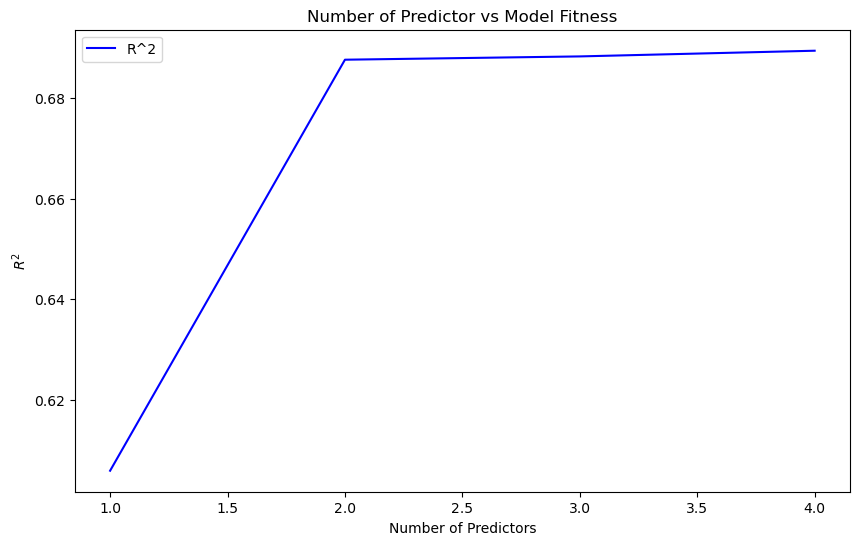

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(range(1, 4+1), R_sq, color='blue', label='R^2')
#ax.plot(range(1, len(cols) + 1), test_R_sq, color='red', label='test R^2')

ax.set_title('Number of Predictor vs Model Fitness')
ax.set_xlabel('Number of Predictors')
ax.set_ylabel('$R^2$')
ax.legend(loc='best')

plt.show()

**POLL**: Which model would you pick now?

A. degree 1 <br>
B. degree 2 <br>
C. degree 3 <br>
D. degree 4 <br>
E. unicorns are yellow

As $m$ increases, the $R^2$ value is becoming larger. (You can prove that this is always true if you add more predictors.)

Let's check the $p$-values for the coefficients for the degree 4 fit.

In [34]:
mr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     285.5
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           8.41e-98
Time:                        21:38:28   Log-Likelihood:                -1132.8
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.6848      4.563     13.298      0.000      51.713      69.657
horsepower              -0.5689      0.118     -4.824      0.000      -0.801      -0.337
I(horsepower ** 2.0)     0.0021      0.001      2.193      0.029       0.000       0.004
I(horsepower ** 3.0) -2.147e-06   2.38e-06     -0.903      0.367   -6.82e-06    2.53e-06
==============================================================================
Omnibus:                       16.987   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.528
Skew:                           0.204   Prob(JB):                     3.18e-08
Kurtosis:                       4.395   Cond. No.                     5.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For $d>2$, the $p$-values are very large, so we don't have a strong relationship between the variables. 

We could rely on *Occam's razor* to decide between models. Occam's razor can be stated: among many different models that explain the data, the simplest one should be used. Since we don't get much benefit in terms of $R^2$ values by choosing $d>2$, we should use $d=2$. 

It is tempting to include a lot of terms in the regression, but this is problematic. A useful model will  *generalize* beyond the data given to it. 

# Appendix

## A1. A guide to transformations

If your data “bulges” in a direction, transform x and/or y in that direction.

Each of these transformations equates to increasing or decreasing the scale of an axis.
+ Roots and logs make a value “smaller”.
+ Raising to a power makes a value “bigger”.
+ There are multiple solutions! Some will fit better than others.

The Tukey-Mosteller Bulge Diagram provides guidance for linearization: The direction of the bulge indicates the directin of the power transformation to straighten the relationship between the variables we explore.

 ![image](tukey-mosteller.jpg)



## A2. Considerations in the linear model: Interaction terms

We can consider the interaction between TV and Radio advertising in the model, by taking 

$$
\text{Sales} = \beta_0 + \beta_1 \times \text{TV_budget} + \beta_2 \times \text{Radio_budget} + \beta_3 \text{TV_budget}  \times \text{Radio_budget}. 
$$

The rational behind the last term is that perhaps spending $x$ on television advertising and $y$ on radio advertising leads to more sales than simply $x+y$. In marketing this is known as the *synergy effect* and in statistics it is known as the *interaction effect*.

**Note**: even though the relationship between the independent and dependent variables is nonlinear, the model is still linear. 

**Another note**: If we include an interaction in a model, we should also  include the main effects, even if the p-values associated  with their coefficients are  not significant (*hierarchy principle*). The rationale for this principle is that interactions are hard to interpret withouth the main effect.

In [35]:
ad_NL = sm.ols(formula="Sales ~ TV + Radio + TV*Radio", data=advert).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):          6.68e-146
Time:                        09:47:56   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is really excellent. All of the $p$-values are small and $R^2 = 97\%$ of the variability in the data is accounted for by the model. 

How do I interpret this now? For every \\$1000 more spent on TV budget, I have an increase in sales by $19.1 + 1.1 \times \text{Radio_budget}$ units. And similarly for the coefficient of Radio.


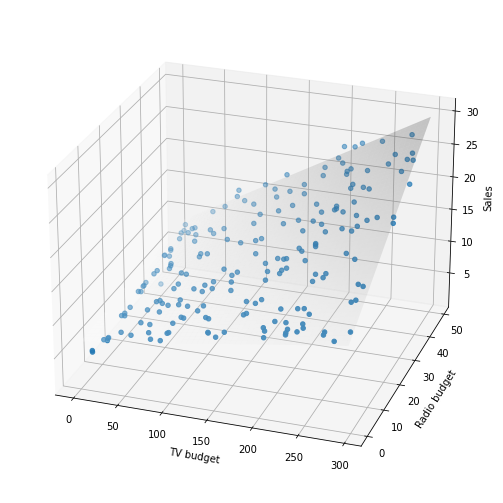

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales'])

x = np.linspace(advert['TV'].min(), advert['TV'].max(), 100)
y = np.linspace(advert['Radio'].min(), advert['Radio'].max(), 100)
X,Y = np.meshgrid(x,y)
par = dict(ad_NL.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y + par["TV:Radio"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()